In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import filterbyip as fbi
import Cdf
import Pmf

In [2]:
%autosave 0

Autosave disabled


In [3]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
#change 
tcp_tls_data = "./AWS_results/Mumbai/data/output_curl_gdrive100.csv"
quic_data = "./AWS_results/Mumbai/data/output_quic_gdrive100.csv"
gdrive = "./data2020/gdrive_id.csv"

In [6]:
scol_names = ['TimeOfMeasurement', 'Url', 'Ip', 'Port', 'DnsLookupTime', 'TCPHandshakeTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'HTTPVersion', 'Protocol']
tcol_names = ['TimeOfMeasurement', 'Url', 'Path', 'Ip', 'Port', 'DNSTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'Protocol']
g_names = ['size', 'id']

In [7]:
t = pd.read_csv(quic_data, ';', names=tcol_names, header=None)
s = pd.read_csv(tcp_tls_data, ';', names=scol_names, header=None)
gd = pd.read_csv(gdrive, ',', names=g_names, header=None)

In [8]:
t = t.dropna()
s=s.dropna()
s['TTFB']=s['TTFB']-s['DnsLookupTime']
s['TotalDownloadTime']=s['TotalDownloadTime']-s['DnsLookupTime']

In [9]:
import re
def extract_id(path):
    id = re.search('\*\/(.*)\?', path)
    return id.group(1)

In [10]:
t['id'] = t['Path'].apply(extract_id)

In [11]:
import re
def substitute(string):
    replaced = string
    if re.search('K', string):
        replaced = re.sub('K','', string)
    if re.search('M', string):
        replaced = re.sub('M','000', string)
    if re.search('G', string):
        replaced = re.sub('G','000000', string)
    return replaced

In [12]:
gd['size'] = gd['size'].apply(substitute)

In [13]:
s['id'] = s['Url'].apply(extract_id)

In [14]:
t['Url'] = t['Url'] + t['Path']

In [15]:
t = t.join(gd.set_index('id'), on='id', rsuffix='_right')

In [16]:
s = s.join(gd.set_index('id'), on='id', rsuffix='_right')

In [17]:
t['size'] = t['size'].astype(int)
s['size'] = s['size'].astype(int)
t['TotalDownloadTime'] = t['TotalDownloadTime'].astype(float)
s['TotalDownloadTime'] = s['TotalDownloadTime'].astype(float)

In [18]:
t['Throughput'] = (t['size']/t['TotalDownloadTime'])

In [19]:
s['Throughput'] = (s['size']/s['TotalDownloadTime'])

In [20]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,id,size,Throughput
0,1.589598e+09,doc-04-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.167.161,443,65.129,125.668,423.932,424.177,403.0,Q043,1lsRzxeAEzsM1KVu6oQ88LgUYuDSKjhmw,200000,471.501284
1,1.589598e+09,doc-04-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.167.161,443,0.700,124.327,428.725,428.790,403.0,Q046,1lsRzxeAEzsM1KVu6oQ88LgUYuDSKjhmw,200000,466.428788
2,1.589598e+09,doc-04-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.167.161,443,3.124,129.355,452.976,453.040,403.0,Q050,1lsRzxeAEzsM1KVu6oQ88LgUYuDSKjhmw,200000,441.462123
8,1.589598e+09,doc-0o-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.167.161,443,66.196,126.353,438.846,438.940,403.0,Q043,1XSSiVM3jWJC09nZxWAYkYMgtGUwCfuEI,500000,1139.107851
9,1.589598e+09,doc-0o-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.167.161,443,0.941,124.600,429.577,429.639,403.0,Q046,1XSSiVM3jWJC09nZxWAYkYMgtGUwCfuEI,500000,1163.767721


In [21]:
t.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,id,size,Throughput
7985,1.589967e+09,doc-14-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.167.161,443,38.186,163.049,444.186,444.248,403.0,Q046,1eIPPQQ3b2GY1jx79eHJn5XF1eSng3my0,1000000,2250.994940
7986,1.589967e+09,doc-14-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.167.161,443,85.848,160.616,483.273,483.333,403.0,Q050,1eIPPQQ3b2GY1jx79eHJn5XF1eSng3my0,1000000,2068.966944
7992,1.589967e+09,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.174.225,443,39.198,161.661,851.779,851.834,403.0,Q043,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,2347.875290
7993,1.589967e+09,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.174.225,443,122.225,158.847,837.292,837.351,403.0,Q046,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,2388.484638
7994,1.589967e+09,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.174.225,443,121.005,166.011,864.023,864.143,403.0,Q050,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,2314.431755


In [22]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol,id,size,Throughput
0,1589684403,doc-04-4c-docs.googleusercontent.com/docs/secu...,172.217.166.33,443,4.217,1.104,116.273,422.048,422.073,403,HTTP/1.1,TCP/TLS1.2,1lsRzxeAEzsM1KVu6oQ88LgUYuDSKjhmw,200000,473.851680
1,1589684403,doc-04-4c-docs.googleusercontent.com/docs/secu...,172.217.166.33,443,4.210,1.095,102.740,405.290,405.363,403,HTTP2,TCP/TLS1.2,1lsRzxeAEzsM1KVu6oQ88LgUYuDSKjhmw,200000,493.384941
2,1589684405,doc-0o-4c-docs.googleusercontent.com/docs/secu...,172.217.166.33,443,4.225,1.510,107.174,417.884,417.910,403,HTTP/1.1,TCP/TLS1.2,1XSSiVM3jWJC09nZxWAYkYMgtGUwCfuEI,500000,1196.429853
3,1589684405,doc-0o-4c-docs.googleusercontent.com/docs/secu...,172.217.166.33,443,4.570,1.191,111.658,420.205,420.417,403,HTTP2,TCP/TLS1.2,1XSSiVM3jWJC09nZxWAYkYMgtGUwCfuEI,500000,1189.295390
4,1589684407,doc-14-4c-docs.googleusercontent.com/docs/secu...,172.217.166.33,443,4.225,1.169,103.699,423.328,423.354,403,HTTP/1.1,TCP/TLS1.2,1eIPPQQ3b2GY1jx79eHJn5XF1eSng3my0,1000000,2362.089410


In [23]:
s.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol,id,size,Throughput
750,1589960710,doc-0g-4c-docs.googleusercontent.com/docs/secu...,172.217.166.161,443,56.408,1.426,1448.431,1747.806,1749.449,403,HTTP2,TCP/TLS1.2,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,1143.217093
751,1589961618,doc-0g-4c-docs.googleusercontent.com/docs/secu...,172.217.26.225,443,31.150,1.772,1390.188,9771.759,9771.826,403,HTTP2,TCP/TLS1.2,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,204.670038
752,1589963417,doc-0o-4c-docs.googleusercontent.com/docs/secu...,172.217.167.161,443,160.032,1.923,4434.027,11875.165,11875.229,403,HTTP2,TCP/TLS1.2,1XSSiVM3jWJC09nZxWAYkYMgtGUwCfuEI,500000,42.104451
753,1589964320,doc-04-4c-docs.googleusercontent.com/docs/secu...,172.217.174.225,443,69.740,1.702,1487.983,10873.572,10873.645,403,HTTP2,TCP/TLS1.2,1lsRzxeAEzsM1KVu6oQ88LgUYuDSKjhmw,200000,18.393096
754,1589967031,doc-14-4c-docs.googleusercontent.com/docs/secu...,172.217.167.161,443,53.511,1.703,5241.430,14045.911,14045.949,403,HTTP/1.1,TCP/TLS1.2,1eIPPQQ3b2GY1jx79eHJn5XF1eSng3my0,1000000,71.194905


In [24]:
gd.head()

,size,id
0,1,1C45gZCBtJHnjNACQIagfJ2fTRKQaZ9k6
1,2,1yv4XxH7R74il-bxBS5Mz8Oiw6W7vwUFM
2,5,1sGGy4K1J3p0OQlLxUgbgsErokyBADg6g
3,10,1k7mg8XpQmW-jpO85yq3giwVUeL82NJhx
4,20,1Zr-g4qROFzaq_vZ4JnHneEb9JyRSUBXb


In [25]:
t = t.dropna()
s = s.dropna()

In [26]:
def filter_by_ip(df, column):
  """reads a DataFrame, calls fbi.filter_v{4,6} to get DataFrames with rows
     containing only v4, v6 endpoints. Returns the two DataFrame as a tuple"""

  dfv6 = fbi.filter_v6(df, column)
  dfv4 = fbi.filter_v4(df, column)
  return dfv4, dfv6

In [27]:
quic4, quic6 = filter_by_ip(t, column = 'Ip')

In [28]:
tcp4, tcp6 = filter_by_ip(s, column = 'Ip')

In [29]:
#quic4 = quic4.loc[quic4['size']<500]
#tcp4 = tcp4.loc[tcp4['size']<500]

In [30]:
quic43 = quic4.loc[t['Protocol'] == 'Q043']
quic46 = quic4.loc[t['Protocol'] == 'Q046']
quic50 = quic4.loc[t['Protocol'] == 'Q050']
quicietf = quic4.loc[t['Protocol'] == 'FF000018']

In [31]:
quic43_6 = quic6.loc[t['Protocol'] == 'Q043']
quic46_6 = quic6.loc[t['Protocol'] == 'Q046']
quic50_6 = quic6.loc[t['Protocol'] == 'Q050']
quicietf_6 = quic6.loc[t['Protocol'] == 'FF000018']

In [32]:
tcp12 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.3']

In [33]:
tcp12_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.3']

In [34]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 = Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quicietf['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['ConnectionEstablishmentTime'].values)
x2 = Cdf.MakeCdfFromList(tcp12['ConnectionEstablishmentTime'].values)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


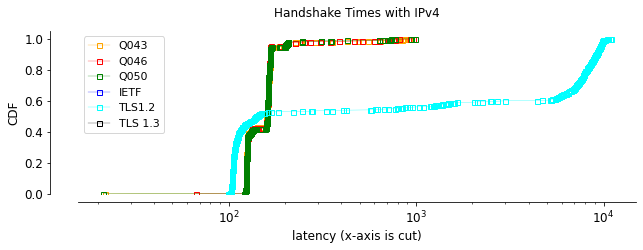

In [35]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q0ietf
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20, 100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF', 'TLS1.2', 'TLS 1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/Mumbai/gdrive100/handshake_times_ipv4_otherthan200.png', format='png', bbox_inches='tight')


In [36]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quicietf['TTFB'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TTFB'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TTFB'].values)

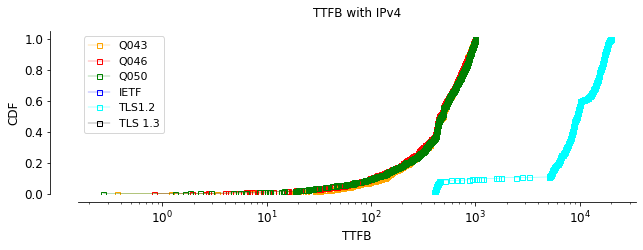

In [37]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#IETF
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([100, 600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF', 'TLS1.2', 'TLS 1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/Mumbai/gdrive100/TTFB_ipv4.png', format='png', bbox_inches='tight')

In [38]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quicietf['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TotalDownloadTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TotalDownloadTime'].values)

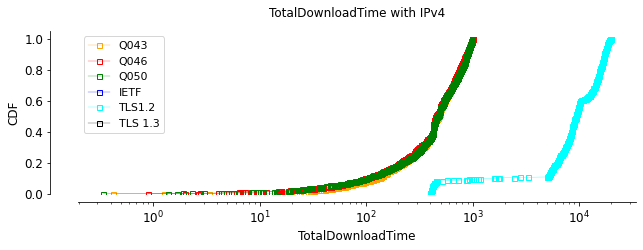

In [39]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#IETF
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([100,800])
#ax.set_xlim([0,10])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF', 'TLS1.2', 'TLS 1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/Mumbai/gdrive100/TotalDownloadTime_ipv4.png', format='png', bbox_inches='tight')

In [40]:
x = Cdf.MakeCdfFromList(quic43['Throughput'].values)
x1 =Cdf.MakeCdfFromList(quic46['Throughput'].values)
x3 = Cdf.MakeCdfFromList(quic50['Throughput'].values)
x5 = Cdf.MakeCdfFromList(quicietf['Throughput'].values)
x4 = Cdf.MakeCdfFromList(tcp13['Throughput'].values)
x2 =Cdf.MakeCdfFromList(tcp12['Throughput'].values)

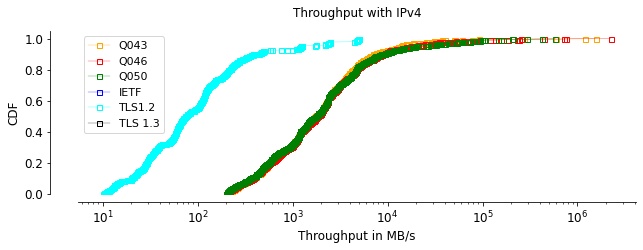

In [41]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#IETF
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([0,700])
#ax.set_xlim([0,10])
ax.set_xscale('log')
ax.set_xlabel('Throughput in MB/s', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF', 'TLS1.2', 'TLS 1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'16thMay - \'20thMay')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Throughput with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/Mumbai/gdrive100/Throughput_ipv4.png', format='png', bbox_inches='tight')

In [42]:
quic_mean= quic4.groupby('size', as_index=False).mean()
tcp_mean= tcp4.groupby('size', as_index=False).mean()

quic_mean.head()

quic_mean.tail()

,size,TimeOfMeasurement,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Throughput
0,200000,1.589777e+09,37.517124,157.955604,496.003941,496.184419,403.0,2103.229979
1,500000,1.589777e+09,42.252397,158.979903,469.030567,470.739280,403.0,5352.905938
2,1000000,1.589777e+09,45.545857,154.124312,486.520471,486.517027,403.0,6563.533444
3,2000000,1.589777e+09,43.974171,158.268907,497.968463,496.796816,403.0,17432.608274


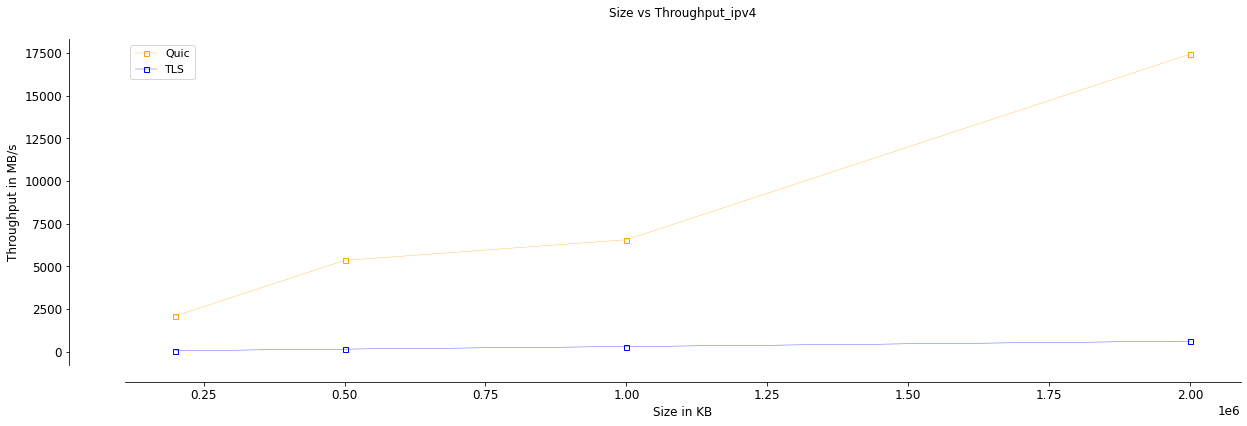

In [43]:
fig = plt.figure(figsize = (20,6))
plt.rcParams['font.size'] = 12
ax = plt.gca()
#yticks = np.arange(1000,100000000,10000)

#Quic
#plt.plot(quic4['size'], quic4['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

#plt.plot(tcp4['size'], tcp4['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
plt.plot(quic_mean['size'], quic_mean['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(tcp_mean['size'], tcp_mean['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')

ax = fig.axes[0]
ax.grid(False)
#ax.set_yticks(yticks)
#ax.set_ylim([0,600])
#ax.set_xlim([0,60000])
#ax.set_xlim([0,10])
ax.set_xscale('linear')
ax.set_xlabel('Size in KB', fontsize=12)
ax.set_ylabel('Throughput in MB/s', fontsize=12)

plt.legend(['Quic', 'TLS'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Size vs Throughput_ipv4', fontsize=12, y=1.05)
plt.savefig('./AWS/Mumbai/gdrive100/sizevsThroughput_ipv4.png', format='png', bbox_inches='tight')

